In [13]:
from ipywidgets import interactive
from collections import defaultdict
import pandas as pd
import os
import sys
sys.path = [os.path.abspath("..")] + sys.path

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, widgets, Layout
from mpl_chord_diagram import chord_diagram
data = pd.read_csv('COW-country-codes.csv', sep=",")
data = data.values.tolist()

years=set()
data1 = pd.read_csv('Diplomatic_Exchange_2006v1.csv', sep=",")
data1 = data1.values.tolist()
for idx in range(len(data1)):
    years.add(int(data1[idx][2]))
years=sorted(list(years))


In [60]:
def sankey(year,Num):
    countries=defaultdict(int)
    coun_name=[]
    for idx in range(len(data)):
        countries[data[idx][0]]=data[idx][1]
        if data[idx][0] not in coun_name:
            coun_name.append(data[idx][0])

    data1 = pd.read_csv('Diplomatic_Exchange_2006v1.csv', sep=",")
    data1 = data1.values.tolist()

    exchange_in_year=defaultdict(int)
    for idx in range(len(data1)):
        if int(data1[idx][2])>=int(year) and int(data1[idx][2])<int(year)+10:
            exchange_in_year[(data1[idx][0],data1[idx][1])]+=data1[idx][4]


    exchange=np.zeros((len(countries),len(countries)))
    for i in range(len(countries)):
        
        for j in range(len(countries)):
            
            exchange[i][j]=exchange_in_year[(countries[coun_name[i]],countries[coun_name[j]])]
    N1=Num
    f=10-int(Num/10)
    chord_diagram(exchange[:N1,:N1], coun_name[0:N1],fontsize=f)        

In [77]:
myy = interactive(sankey,year = widgets.IntSlider(min = 1920, max = 2000, step = 10, value = 1920),
    Num=widgets.Dropdown(options=[20,30,40,200],value=20,description="Number of countries to display: ",disabled=False))
myy

interactive(children=(IntSlider(value=1920, description='year', max=2000, min=1920, step=10), Dropdown(descrip…

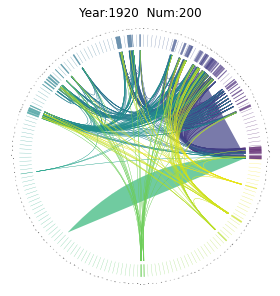

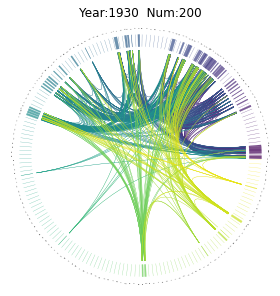

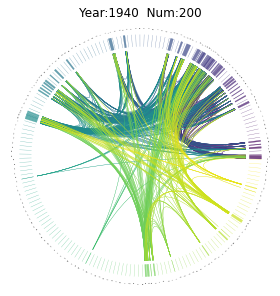

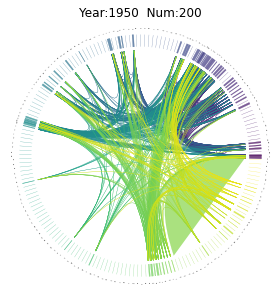

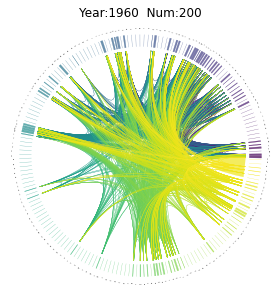

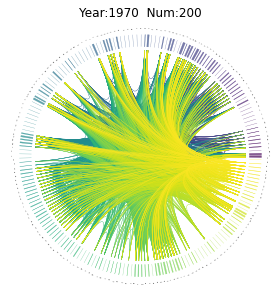

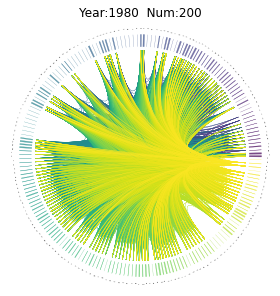

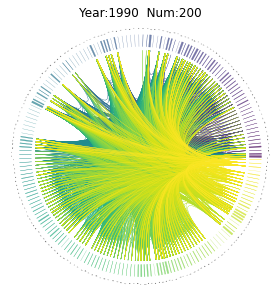

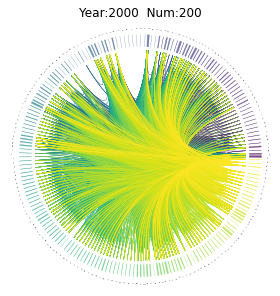

In [76]:
for y in range(1920,2010,10):
        N=200
        sankey(y,N)

        plt.title("Year:{}  Num:{}".format(y,N)) 
        plt.savefig("./{}_{}.png".format(N,y,N).format(y,N), dpi=600,
                transparent=True,
                bbox_inches='tight', pad_inches=0.02)